In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

## Чтение из датасета

In [2]:
data = pd.read_csv('./res/Credit_Screening.dat', sep=';')

## Определение тестовой и учебной выборок

In [3]:
x = data.drop(['desired1', 'desired2'], axis=1)
y = data['desired2']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(f'x_train.shape: {x_train.shape}, y_train.shape: {y_train.shape}')
print(f'x_test.shape: {x_test.shape}, y_test.shape: {y_test.shape}')

x_train.shape: (457, 46), y_train.shape: (457,)
x_test.shape: (196, 46), y_test.shape: (196,)


## Всего датасет имеет 653 записи. </br>
## Обучающая и тестовая выборки были разделены в соотношении 7 : 3

### Переменные для отслеживания наилучшего значения k и соответствующей точности

In [4]:
best_k = None
best_accuracy = 0
k_range = range(1, 26)
scores_list = []

### Определение наилучшего значения k

In [5]:
for k in k_range: 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train) # Модель KNN обучается на обучающих данных x_train и y
    y_pred = knn.predict(x_test) # Модель используется для предсказания классов на тестовых данных
    accuracy = accuracy_score(y_test, y_pred) # Вычисляется точность модели сравнивая предсказанные значения и истинные
    scores_list.append(accuracy)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Наилучшее значение k: {best_k}")

Наилучшее значение k: 4


## Обучение модели с наилучшим значением k

In [6]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

## Вычисление матрицы сопряжённости

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred) #ф-ция вычисляет матрицу сопряженности для оценки качества модели.
print("Таблица сопряженности:")
print(conf_matrix)

Таблица сопряженности:
[[92 17]
 [40 47]]


## Вычисление процента ошибок и качества прогноза

In [8]:
error_rate = 1 - accuracy_score(y_test, y_pred) #Вычисляется процент ошибок, который = 1 - точность.
print(f"Процент ошибок: {error_rate * 100:.2f}%")
print(f"Качество прогноза: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Процент ошибок: 29.08%
Качество прогноза: 70.92%


## Отрисовка графика процентной зависимости от k

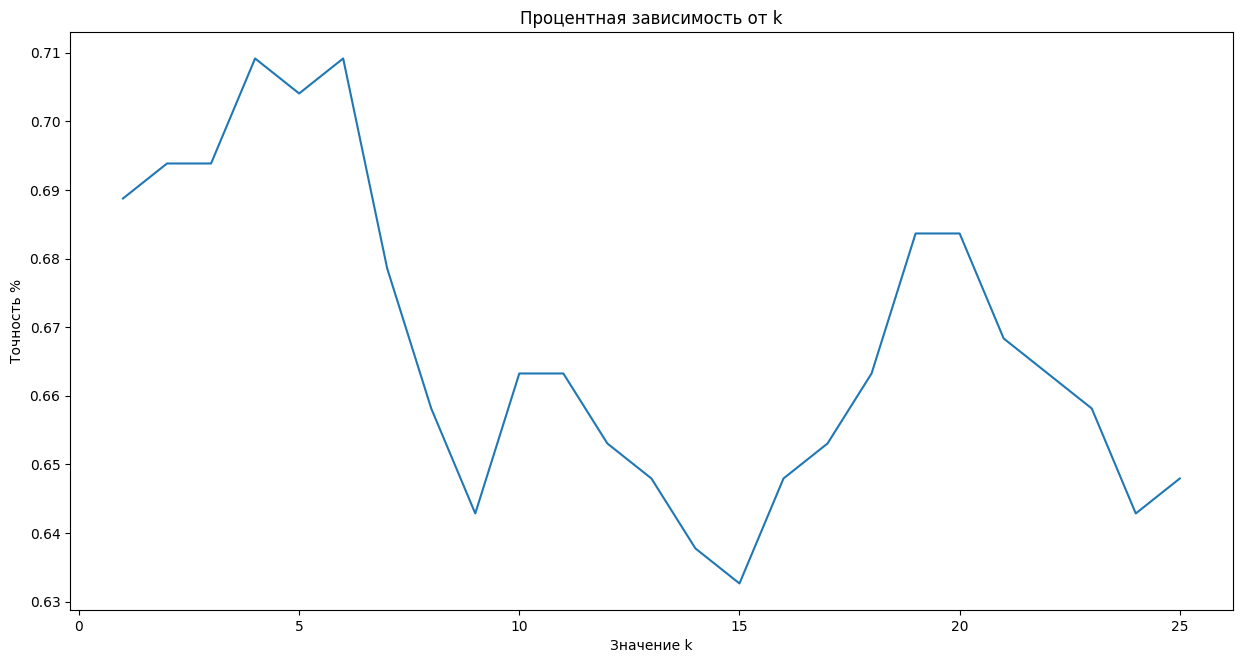

In [9]:
plt.figure(figsize=(15, 7.5))
plt.plot(k_range, scores_list)
plt.title('Процентная зависимость от k')
plt.xlabel('Значение k')
plt.ylabel('Точность %')
plt.show()